# Big Mart Sales Analysis

**Dataset description:**
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

**Atrribute information:**  
Item_Identifier : Unique product ID  
Item_Weight : Weight of product  
Item_Fat_Content : Whether the product is low fat or not  
Item_Visibility : % of total display area in store allocated to this product  
Item_Type : Category to which product belongs  
Item_MRP : Maximum Retail Price (list price) of product  
Outlet_Identifier : Unique store ID  
Outlet_Establishment_Year : Year in which store was established  
Outlet_Size : Size of the store  
Outlet_Location_Type : Type of city in which store is located  
Outlet_Type : Grocery store or some sort of supermarket  
Item_Outlet_Sales : Sales of product in particular store. This is the outcome variable to be predicted.  

# Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing in the dataset

In [2]:
train_data=pd.read_csv("C:\\Users\\Dell\\Desktop\\Internship project\\9961_14084_bundle_archive\\Train.csv")
test_data=pd.read_csv("C:\\Users\\Dell\\Desktop\\Internship project\\9961_14084_bundle_archive\\Test.csv")

In [3]:
train_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Exploratory Data Analysis

In [5]:
train_data.shape

(8523, 12)

In [6]:
test_data.shape

(5681, 11)

In [7]:
train_data['source'] = 'train'
test_data['source'] = 'test'
df=pd.concat([train_data,test_data], ignore_index=True)

In [8]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


_Here we have a statistical description of all numeric columns of the dataset._

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


_The statistical description of the dataset including all columns._

In [10]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000,14204
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,2
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,train
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN,8523
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914,NaN
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,NaN
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400,NaN
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000,NaN
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400,NaN


_Information about the Dataset including the index dtype and column dtypes, non-null values._

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

_Now we check the count of null values present in each column and we'll try to replace or remove the null values._

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [13]:
df.shape

(14204, 13)

# Univariate Analysis


Text(0, 0.5, 'Density')

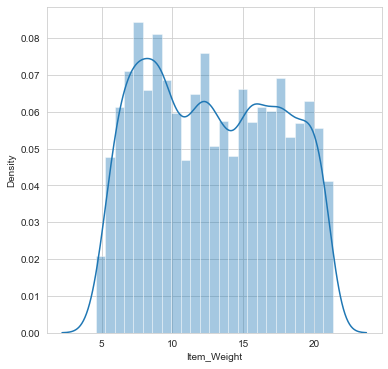

In [14]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
sns.distplot(train_data.Item_Weight, bins = 25)
plt.xlabel("Item_Weight")
plt.ylabel("Density")


We can observe three categories of Weight being formed.

Items falling in lower weight category might be snacks,  
Average weight items might include, soft- drinks or other stuff  
High weight categories might be heavy household items.  

Text(0, 0.5, 'Density')

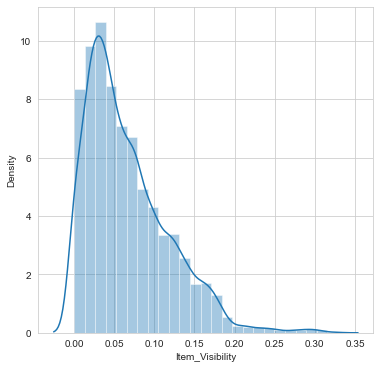

In [15]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
sns.distplot(train_data.Item_Visibility, bins = 25)
plt.xlabel("Item_Visibility")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

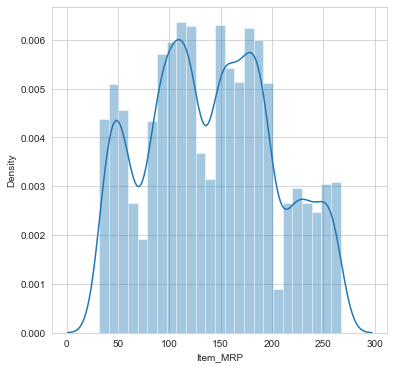

In [16]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
sns.distplot(train_data.Item_MRP, bins = 25)
plt.xlabel("Item_MRP")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

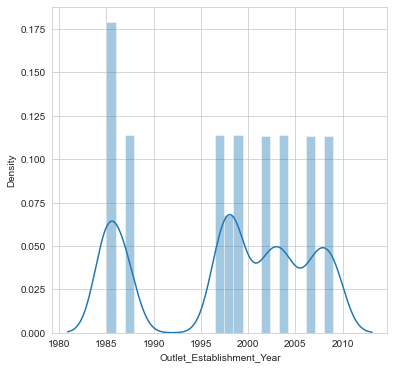

In [17]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
sns.distplot(train_data.Outlet_Establishment_Year, bins = 25)
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

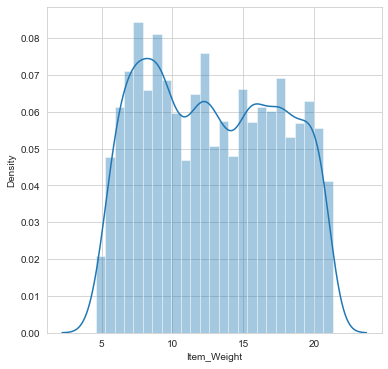

In [18]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
sns.distplot(train_data.Item_Weight, bins = 25)
plt.xlabel("Item_Weight")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

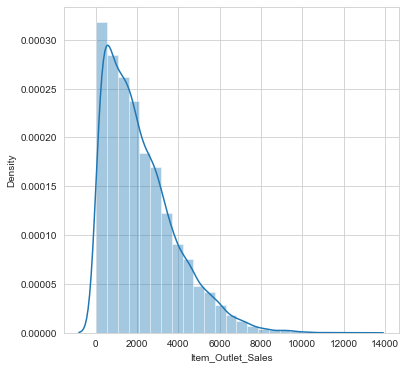

In [19]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
sns.distplot(train_data.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Density")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

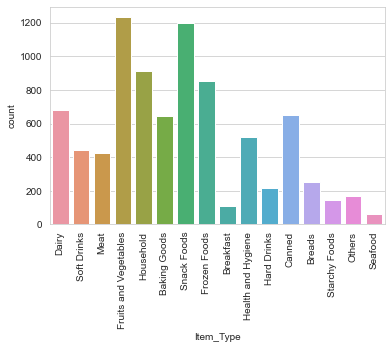

In [20]:
sns.countplot(train_data.Item_Type)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

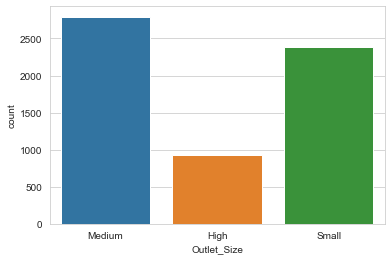

In [21]:
sns.countplot(train_data.Outlet_Size)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

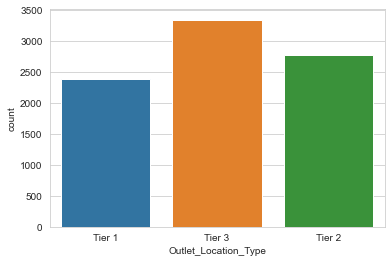

In [22]:
sns.countplot(train_data.Outlet_Location_Type)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

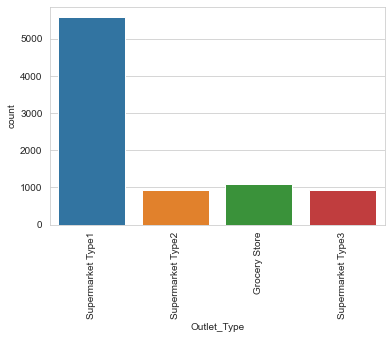

In [23]:
sns.countplot(train_data.Outlet_Type)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

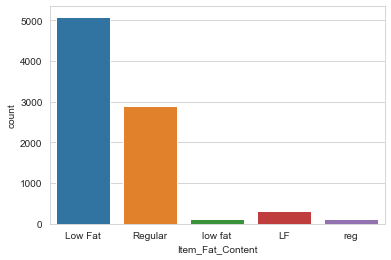

In [24]:
sns.countplot(train_data.Item_Fat_Content)

In [25]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [26]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',})

In [27]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [28]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',})

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

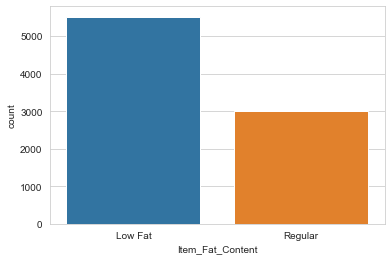

In [29]:
sns.countplot(train_data.Item_Fat_Content)

# Bivariate Analysis

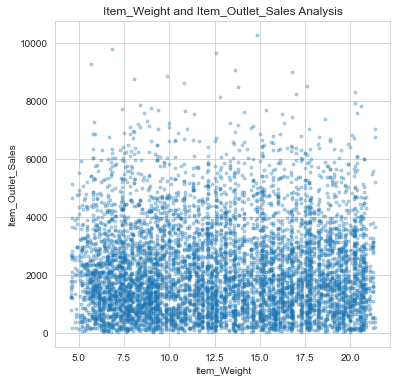

In [30]:
plt.figure(figsize=(6,6))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train_data.Item_Weight, train_data.Item_Outlet_Sales,'.', alpha = 0.3)

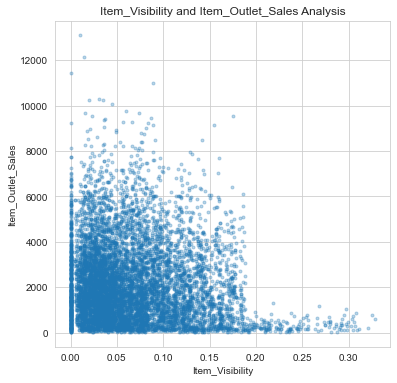

In [31]:
plt.figure(figsize=(6,6))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train_data.Item_Visibility, train_data.Item_Outlet_Sales,'.', alpha = 0.3)

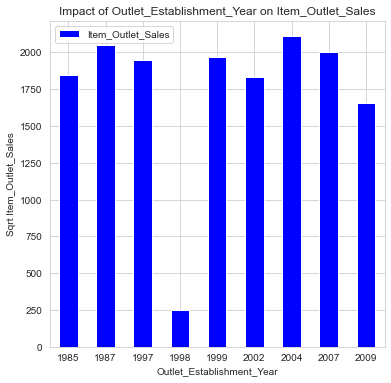

In [32]:
Outlet_Establishment_Year_pivot = train_data.pivot_table(index='Outlet_Establishment_Year',values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(6,6))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

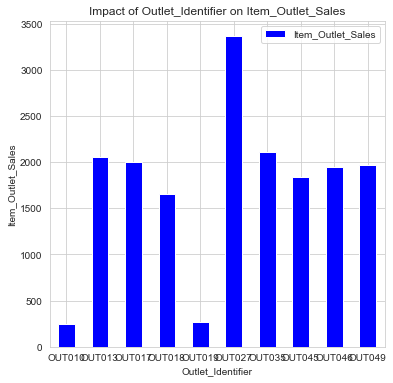

In [33]:
Outlet_Identifier_pivot = train_data.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(6,6))

plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

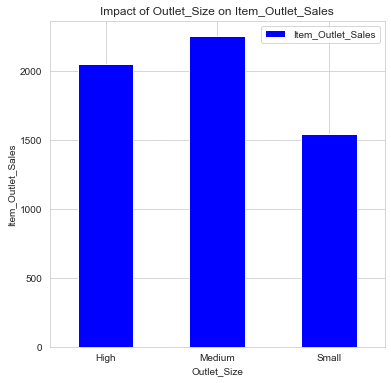

In [34]:
Outlet_Size_pivot = train_data.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(6,6))

plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

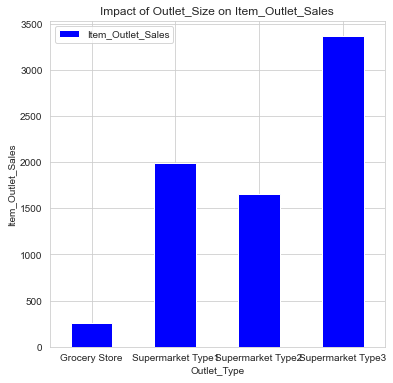

In [35]:
Outlet_Type_pivot = train_data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(6,6))

plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

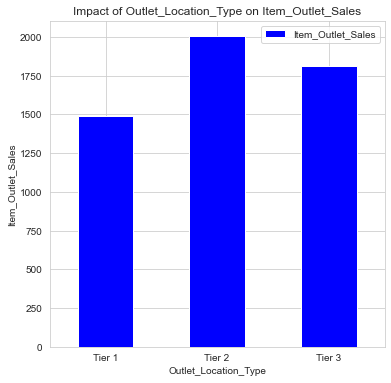

In [36]:
Outlet_Location_Type_pivot = train_data.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(6,6))

plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

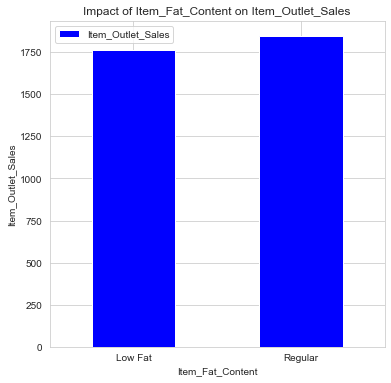

In [37]:
Item_Fat_Content_pivot = train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(6,6))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [38]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


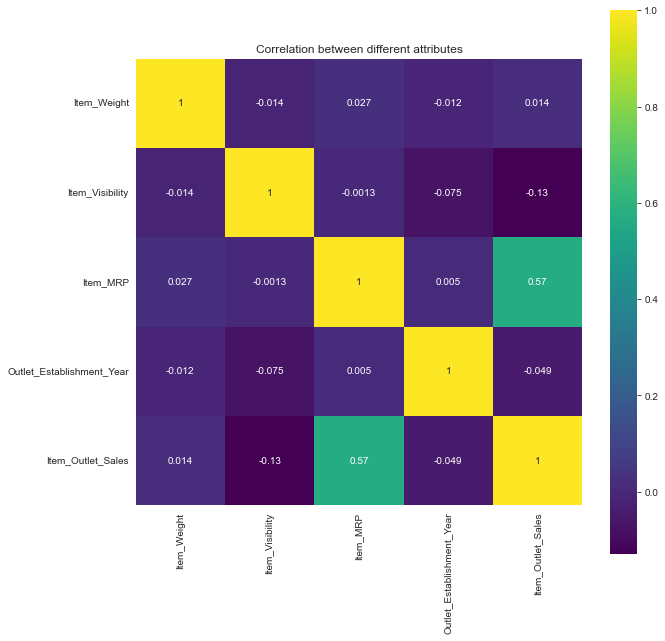

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(),vmax=1, square=True,annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

# Feature Engineering

In [40]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

# Treating The Missing Values

**Item_Weight**  

The item_weight column is approximately normal and it is therefore helpful to replace the missing values with the Mean of the column.

In [41]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [42]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

**Outlet_Size**

The missing values in Outlet_Size with the item that appears frequently and it is therefore to replace the missing values with the mode.

In [43]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [44]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [45]:
df['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)


In [46]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

**Item_Visibility**  
For an above distribution plot We can see Item_Visibility has 0 value too for some items, which sounds impractical. If an item is being sold at the Big Mart then how is is it possible for the visibility of that item to be zero


In [47]:
print(min(df['Item_Visibility']))

0.0


In [48]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [49]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(), inplace=True)

**Outlet_Size**

In [50]:
df['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [51]:
df.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


**Outlet_Establishment_Year**

In [52]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [53]:
df['Outlet_Years'] = 2009-df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()
df['Outlet_Years'].head()

0    10
1     0
2    10
3    11
4    22
Name: Outlet_Years, dtype: int64

**Item_Type**

In [54]:
print(df['Item_Type'].nunique())
print(df['Item_Type'].unique())

16
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [55]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [56]:
df['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

The Item_Type variable has 16 unique categories for items. It might be a good idea to combine them to get better results. We can manually assign each of them into new categories.

Or if we look at Item_Identifier we see first two characters denote 'FD', 'DR' and 'NC' which mean 'Food', 'Drink' and 'Non - Consumable' respectively.

We can use it to assign categories.

In [57]:
df['New_Item_type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [58]:
df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_type, dtype: int64

In [59]:
df.loc[df['New_Item_type']=='Non-Consumable','Item_Fat_Content']= "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [60]:
item_visib_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [61]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [62]:
function = lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]
df['item_visib_avg'] = df.apply(function,axis=1).astype(float)

In [63]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable,0.000000


# Encoding Categorical Variables

**Label Encoding**  

We have our dataset in the above Feature Engineered form. Now we'll do numerical encoding of the categorical columns which are of string type.  
In the cell below we have imported LabelEncoder method from sklearn.preprocessing to encode categorical columns into numericals.  

In [64]:
encoder = LabelEncoder()
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
 

df['Outlet'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

df['New_Item_type'] = encoder.fit_transform(df['New_Item_type'])

In [65]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg,Outlet
0,156,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,train,10,1,0.931078,9
1,8,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,train,0,0,0.933420,3
2,662,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,train,10,1,0.960069,9
3,1121,19.20,2,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800,train,11,1,0.000000,0
4,1297,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,train,22,2,0.000000,1


So our model might get confuse and give more weightage to category with higher number which is not the case.  

Hence, we have to create dummies in order to give equal importance to each category present.  

In the cell below we create dummy variables for the categorical columns.  

# One Hot Encoding

In [66]:
df = pd.get_dummies(df, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet'])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  int32  
 1   Item_Weight                14204 non-null  float64
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  int32  
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   source                     14204 non-null  object 
 9   Outlet_Years               14204 non-null  int64  
 10  item_visib_avg             14204 non-null  float64
 11  Item_Fat_Content_0         14204 non-null  uint8  
 12  Item_Fat_Content_1         14204 non-null  uint8  
 13  Item_Fat_Content_2         14204 non-null  uin

# Model Building

In [68]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [69]:
train.drop(['source'],axis=1,inplace=True)

In [70]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [71]:
X_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
Y_train = train['Item_Outlet_Sales']

In [72]:
X_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=2)


# Standarization  

In [74]:
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [75]:
x_train_std

array([[-0.23889427, -0.1700305 ,  0.65773268, ..., -0.34786898,
         2.84654242, -0.34866323],
       [-0.00434798, -1.28549807, -1.71560492, ..., -0.34786898,
        -0.35130339, -0.34866323],
       [-1.20154931, -0.3572697 , -1.00360364, ..., -0.34786898,
         2.84654242, -0.34866323],
       ...,
       [ 1.39112285,  0.5035508 ,  0.65773268, ..., -0.34786898,
        -0.35130339, -0.34866323],
       [-0.92869862,  0.4037263 , -0.0542686 , ...,  2.87464554,
        -0.35130339, -0.34866323],
       [-1.46022594,  0.74344933, -1.71560492, ..., -0.34786898,
        -0.35130339, -0.34866323]])

In [76]:
x_test_std

array([[-0.00434798,  0.65218954, -0.29160236, ..., -0.34786898,
        -0.35130339, -0.34866323],
       [-0.15621224,  1.26795963, -0.52893612, ...,  2.87464554,
        -0.35130339, -0.34866323],
       [-1.65630047,  1.26359938, -0.76626988, ...,  2.87464554,
        -0.35130339, -0.34866323],
       ...,
       [ 1.4856166 ,  2.17761528,  0.42039892, ..., -0.34786898,
        -0.35130339, -0.34866323],
       [ 1.39112285, -1.28549807,  1.36973396, ..., -0.34786898,
        -0.35130339, -0.34866323],
       [-1.42479079,  0.38478172, -0.29160236, ...,  2.87464554,
        -0.35130339, -0.34866323]])

# Linear Regression

In [77]:
lr = LinearRegression(normalize=True)

lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [78]:
lr_pred = lr.predict(x_test)

In [79]:
lr_pred


array([2816., 3968., 1280., ..., 2944., 3840., 3584.])

In [80]:
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.5590312376691491, 0.5445506816365191)

In [81]:
print('Score:',round(lr.score(x_train,y_train)*100))


Score: 56


MAE: 887.8623232844575
MSE: 1406006.072618419
RMSE: 1185.7512692881332


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

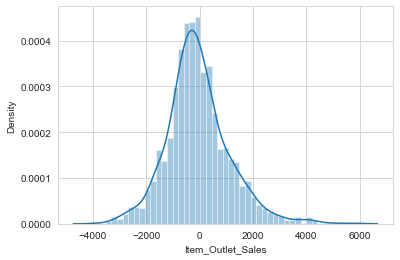

In [82]:
print('MAE:',metrics.mean_absolute_error(y_test,lr_pred))
print('MSE:',metrics.mean_squared_error(y_test,lr_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))
sns.distplot(y_test-lr_pred)

# Random Forest

In [83]:
rf = RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)

rf.fit(x_train,y_train)



RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_estimators=400,
                      n_jobs=4)

In [84]:
rf_pred=rf.predict(x_test)
rf_pred

array([1471.55876935, 3883.9337846 , 1380.44663696, ..., 2834.66411134,
       3884.69484519, 3883.26533471])

In [85]:
print('Score:',round(rf.score(x_train,y_train)*100))



Score: 61


MAE: 793.7051802147065
MSE: 1286915.1966337091
RMSE: 1134.4228473694054


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

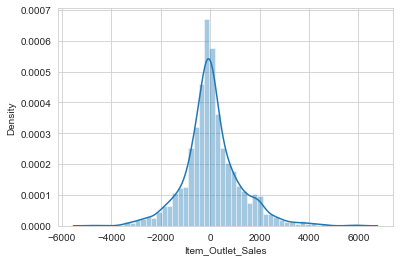

In [86]:
print('MAE:',metrics.mean_absolute_error(y_test,rf_pred))
print('MSE:',metrics.mean_squared_error(y_test,rf_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))
sns.distplot(y_test-rf_pred)

# XGBoost

In [87]:
model = XGBRegressor(n_estimators = 100, learning_rate=0.05)
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [88]:
y_pred = model.predict(x_test)
y_pred

array([2165.8887, 3952.93  , 1427.2518, ..., 2905.9768, 3315.7842,
       3678.778 ], dtype=float32)

In [89]:
print('Score:',model.score(x_train, y_train)*100)


Score: 69.43318596457


MAE: 796.9015190023096
MSE: 1319303.2342840564
RMSE: 1148.6092609256013


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

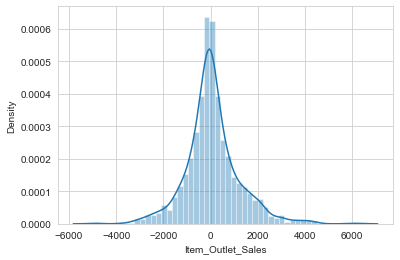

In [90]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
sns.distplot(y_test-y_pred)

# Regularized Linear Regression

In [91]:
lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)



Lasso(alpha=0.01)

In [92]:
print('Score:')
lasso = round(lasso.score(x_train,y_train)*100)
lasso

Score:


57

In [93]:
ridge = Ridge(alpha = 0.5)
ridge.fit(x_train, y_train)
ridges = ridge.predict(x_test)


In [94]:
ridges

array([2640.10709037, 3834.37833649, 1368.71147769, ..., 2792.75712862,
       3798.42331552, 3582.49507969])

In [95]:
print('Score:')
ridge_y = round(ridge.score(x_train,y_train)*100)
ridge_y 

Score:


57

MAE: 873.0702505321943
MSE: 1400397.7288569394
RMSE: 1183.384015802537


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

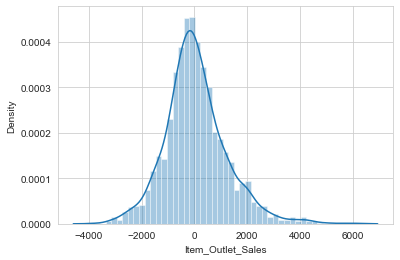

In [96]:
print('MAE:',metrics.mean_absolute_error(y_test,ridges))
print('MSE:',metrics.mean_squared_error(y_test,ridges))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,ridges)))
sns.distplot(y_test-ridges)

# Summarization

We performed Exploratory Data Analysis of the dataset of Big Mart Sales by looking at some amaing visualizations, we decided which variables can be good predictors and which variables on some modification can perform the task of a good predictor for the Sales.  

Then we performed feature engineering on our dataset as required. We modified some columns for the convenience of prediction. Label encoded the columns, and created dummy variables.  

In order to find a decent model to predict sales an extensive search of various machine learning models available in Python was performed.  